In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, plot_roc_curve, accuracy_score, f1_score, cross_val_score

from xgboost import XGBClassifier

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import utils as ut

In [82]:
data = pd.read_csv('data/training_set_features.csv')
labels = pd.read_csv('data/training_set_labels.csv')

In [83]:
# The features in this dataset
# You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

# For all binary variables: 0 = No; 1 = Yes.

# h1n1_concern - Level of concern about the H1N1 flu.
# 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
# h1n1_knowledge - Level of knowledge about H1N1 flu.
# 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
# behavioral_antiviral_meds - Has taken antiviral medications. (binary)
# behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
# behavioral_face_mask - Has bought a face mask. (binary)
# behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
# behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
# behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
# behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
# doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
# doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
# chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
# child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
# health_worker - Is a healthcare worker. (binary)
# health_insurance - Has health insurance. (binary)
# opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
# 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
# opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
# 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
# opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
# 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
# opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
# 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
# opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
# 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
# opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
# 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
# age_group - Age group of respondent.
# education - Self-reported education level.
# race - Race of respondent.
# sex - Sex of respondent.
# income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
# marital_status - Marital status of respondent.
# rent_or_own - Housing situation of respondent.
# employment_status - Employment status of respondent.
# hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
# census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
# household_adults - Number of other adults in household, top-coded to 3.
# household_children - Number of children in household, top-coded to 3.
# employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
# employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

In [84]:
# train test split
# deal with nulls
# look for patterns in the nulls
# no numeric columns so no need to look for outliers
# one hot encode categorical columns
# scale
# vanilla model
# check for multicolinearity (or variables that are not independent)
# solve class imbalance problems?? - no need
# look for interactions? - marital status and sex, also employment status and sex
# logistic regression!
# -->can experiment with the regularization parameter (C)
# eval measure should be ROC-AUC (for competition anyway)
# try a tree!  a forest!
# try ensemble method?  XGBoost?
# pipeline!
# use confusion matrices to evaluate
# what can be learned from coefficients

# does health worker data match employment data?


In [85]:
# use k fold cross validation to make sure you're not overfitting to this test set
# try all combos for other models, use gridsearch
# steal and use Lindsey's evaluate function if you want - Topic 32 Pipelines plus phase 3 wrap up
# it includes a confusion matrix
# if doing a logreg, look at week 20 optional challenge

In [86]:

# look at practice notebook from week 22
# shows steps of building a simple model, testing models, iterating, choosing a model
# try to do 3 model types

# include all detail on "why did I make that decision?"  "why did I do that next step?"
# especially: why did you decide to use this model?


In [87]:
labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [88]:
# define X (predictors) and y (target)
# keep only predictors which a health management organization would have on file
# use seasonal flu vaccine outcome as target (disregard H1N1)

X = data.drop(columns=['h1n1_concern',
                       'h1n1_knowledge',
                       'behavioral_antiviral_meds',
                       'behavioral_avoidance',
                       'behavioral_face_mask',
                       'behavioral_wash_hands',
                       'behavioral_large_gatherings',
                       'behavioral_outside_home',
                       'behavioral_touch_face',
                       'doctor_recc_h1n1',
                       'child_under_6_months',
                       'opinion_h1n1_vacc_effective',
                       'opinion_h1n1_risk',
                       'opinion_h1n1_sick_from_vacc',
                       'opinion_h1n1_sick_from_vacc',
                       'opinion_seas_vacc_effective',
                       'opinion_seas_risk',
                       'opinion_seas_sick_from_vacc',
                       'education',
                       'income_poverty',
                       'rent_or_own',
                       'household_adults',
                       'household_children'])

y = labels['seasonal_vaccine']

In [89]:
X

,respondent_id,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group,race,sex,marital_status,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,0,0.00000,0.00000,0.00000,1.00000,55 - 64 Years,White,Female,Not Married,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,1,0.00000,0.00000,0.00000,1.00000,35 - 44 Years,White,Male,Not Married,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,2,nan,1.00000,0.00000,nan,18 - 34 Years,White,Male,Not Married,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,3,1.00000,1.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,4,0.00000,0.00000,0.00000,nan,45 - 54 Years,White,Female,Married,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0.00000,0.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,26703,1.00000,0.00000,1.00000,1.00000,18 - 34 Years,White,Male,Not Married,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,26704,0.00000,0.00000,0.00000,nan,55 - 64 Years,White,Female,Not Married,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,26705,0.00000,0.00000,0.00000,0.00000,18 - 34 Years,Hispanic,Female,Married,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [90]:
# eliminate id column, which is the same as index number

X.drop(columns='respondent_id', inplace=True)
X

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group,race,sex,marital_status,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,0.00000,0.00000,0.00000,1.00000,55 - 64 Years,White,Female,Not Married,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,0.00000,0.00000,0.00000,1.00000,35 - 44 Years,White,Male,Not Married,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,nan,1.00000,0.00000,nan,18 - 34 Years,White,Male,Not Married,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,1.00000,1.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,0.00000,0.00000,0.00000,nan,45 - 54 Years,White,Female,Married,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.00000,0.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,1.00000,0.00000,1.00000,1.00000,18 - 34 Years,White,Male,Not Married,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,0.00000,0.00000,0.00000,nan,55 - 64 Years,White,Female,Not Married,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,0.00000,0.00000,0.00000,0.00000,18 - 34 Years,Hispanic,Female,Married,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [91]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [92]:
# no class imbalance in target

y_train.value_counts()

0    10694
1     9336
Name: seasonal_vaccine, dtype: int64

In [93]:
# explore variables

X_train
X_train.describe()
X_train.info()

# many nulls
# many categorical columns --> need to encode

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 8425 to 24840
Data columns (total 13 columns):
doctor_recc_seasonal     18425 non-null float64
chronic_med_condition    19321 non-null float64
health_worker            19441 non-null float64
health_insurance         10837 non-null float64
age_group                20030 non-null object
race                     20030 non-null object
sex                      20030 non-null object
marital_status           18982 non-null object
employment_status        18937 non-null object
hhs_geo_region           20030 non-null object
census_msa               20030 non-null object
employment_industry      10011 non-null object
employment_occupation    9899 non-null object
dtypes: float64(4), object(9)
memory usage: 2.1+ MB


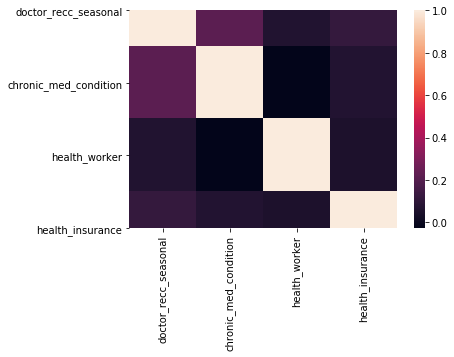

In [94]:
# heatmap shows few correlations due to high number of nulls and categorical columns

corr = X_train.corr()
sns.heatmap(corr)


In [95]:
# show per cent nulls by column
# about half of data is missing for health_insurance, employment_industry, employment_occupation

round((X_train.isna().sum()*100/len(X_train)),2)

doctor_recc_seasonal     8.01000
chronic_med_condition    3.54000
health_worker            2.94000
health_insurance        45.90000
age_group                0.00000
race                     0.00000
sex                      0.00000
marital_status           5.23000
employment_status        5.46000
hhs_geo_region           0.00000
census_msa               0.00000
employment_industry     50.02000
employment_occupation   50.58000
dtype: float64

In [96]:
# look closer at three columns with high null percentages - see if there is an obvious choice to impute

for c in X_train[['health_insurance','employment_industry','employment_occupation']]:
    print(X_train[c].value_counts())
    
# most ppl have health insurance, I can create a new column to indicate which rows are missing this info
# employment industry and occupation - when encoded, nulls will be ignored

1.00000    9500
0.00000    1337
Name: health_insurance, dtype: int64
fcxhlnwr    1866
wxleyezf    1363
ldnlellj     904
pxcmvdjn     783
atmlpfrs     687
xicduogh     658
arjwrbjb     639
mfikgejo     463
rucpziij     388
vjjrobsf     372
xqicxuve     370
cfqqtusy     254
saaquncn     252
nduyfdeo     224
mcubkhph     218
wlfvacwt     158
dotnnunm     140
haxffmxo     106
msuufmds      91
phxvnwax      69
qnlwzans       6
Name: employment_industry, dtype: int64
xtkaffoo    1309
mxkfnird    1085
emcorrxb     968
cmhcxjea     935
xgwztkwe     817
hfxkjkmi     577
qxajmpny     429
xqwwgdyp     369
kldqjyjy     343
uqqtjvyb     329
ukymxvdu     299
tfqavkke     292
oijqvulv     260
bxpfxfdn     257
vlluhbov     255
ccgxvspp     248
haliazsg     230
rcertsgn     196
xzmlyyjv     186
dlvbwzss     166
hodpvpew     162
dcjcmpih     106
pvmttkik      81
Name: employment_occupation, dtype: int64


In [97]:
# create new df X_train_plot to contain a numeric age column for plotting

X_train_plot=X_train.copy()
X_train_plot['age_group_num'] = X_train_plot['age_group'].apply(lambda x:1 if (x == '18 - 34 Years')
                                                        else 2 if (x == '35 - 44 Years')
                                                        else 3 if (x == '45 - 54 Years')
                                                        else 4 if (x == '55 - 64 Years')
                                                        else 5)

In [98]:
# concatenate X_train_plot and y_train to create a df for plotting bar graphs

train_to_plot = pd.concat([X_train_plot, y_train], axis=1).drop(columns='age_group')
train_to_plot

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,race,sex,marital_status,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation,age_group_num,seasonal_vaccine
8425,0.00000,0.00000,0.00000,nan,White,Male,Not Married,Not in Labor Force,atmpeygn,"MSA, Principle City",NaN,NaN,1,0
23315,0.00000,1.00000,0.00000,nan,White,Male,Married,Employed,kbazzjca,"MSA, Not Principle City",vjjrobsf,rcertsgn,3,1
9773,0.00000,0.00000,0.00000,0.00000,Black,Female,Not Married,Unemployed,lzgpxyit,"MSA, Principle City",NaN,NaN,1,0
958,1.00000,1.00000,0.00000,nan,White,Male,Married,Not in Labor Force,qufhixun,"MSA, Principle City",NaN,NaN,5,0
7063,0.00000,0.00000,0.00000,1.00000,White,Male,Married,Employed,mlyzmhmf,"MSA, Principle City",xicduogh,mxkfnird,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,0.00000,0.00000,0.00000,nan,White,Female,Not Married,Employed,lrircsnp,"MSA, Principle City",wxleyezf,bxpfxfdn,4,0
14236,0.00000,0.00000,0.00000,1.00000,White,Male,Married,Employed,lzgpxyit,Non-MSA,pxcmvdjn,xgwztkwe,3,1
25870,0.00000,0.00000,0.00000,nan,White,Male,Married,Employed,mlyzmhmf,Non-MSA,arjwrbjb,xzmlyyjv,4,0
12986,0.00000,0.00000,0.00000,0.00000,White,Female,Not Married,Employed,lzgpxyit,Non-MSA,fcxhlnwr,emcorrxb,1,0


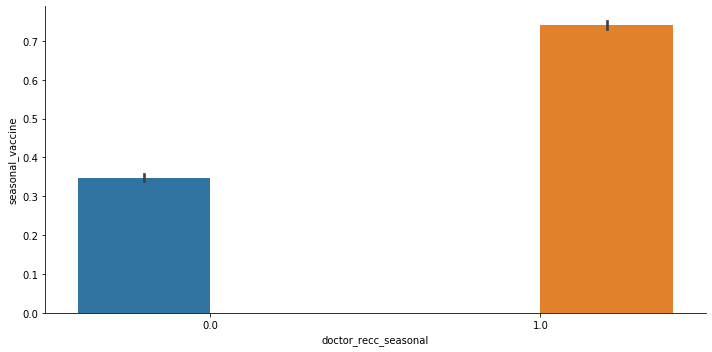

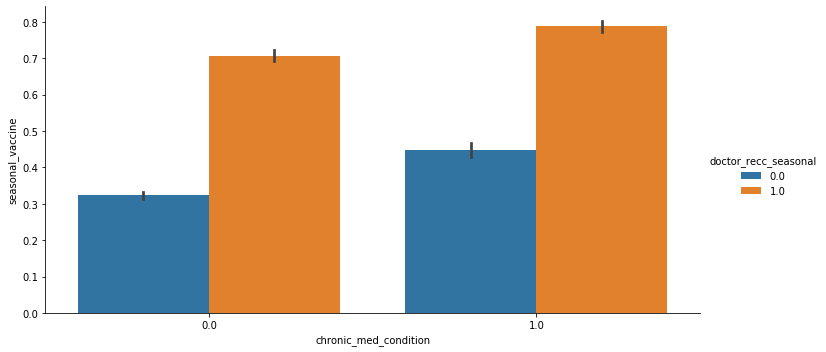

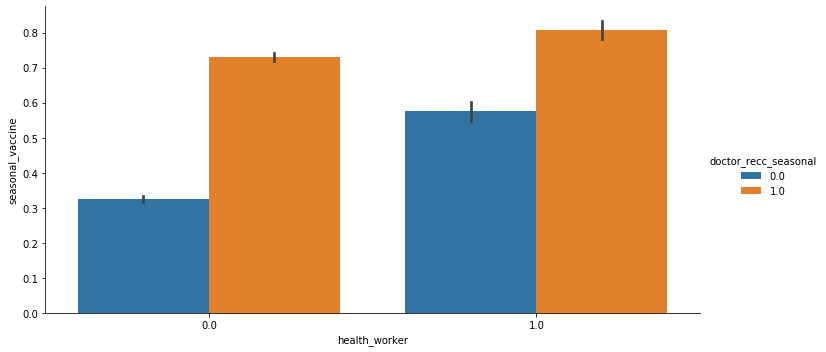

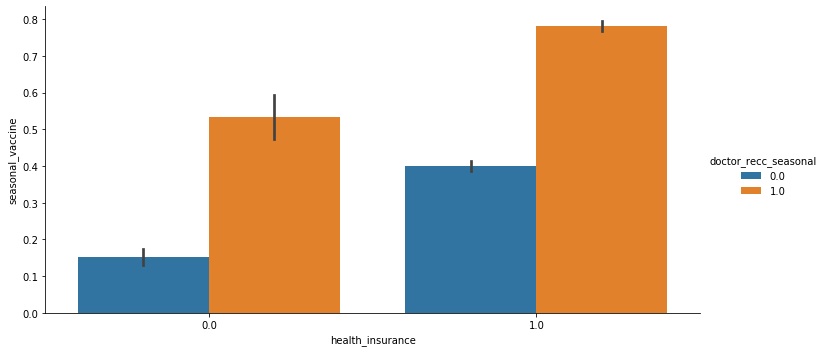

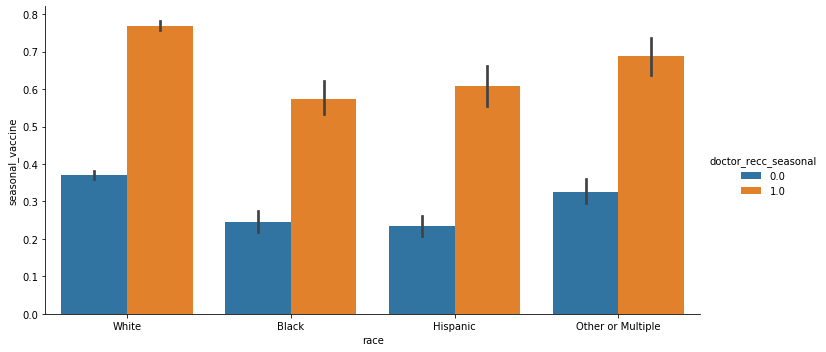

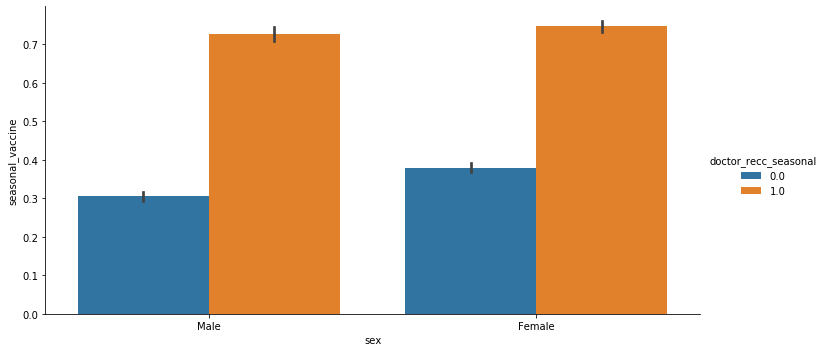

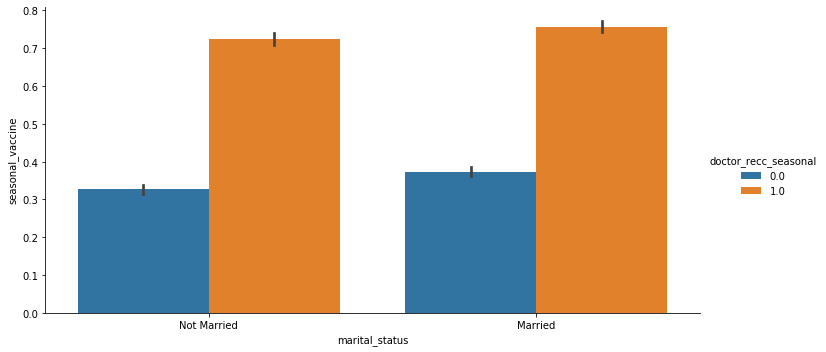

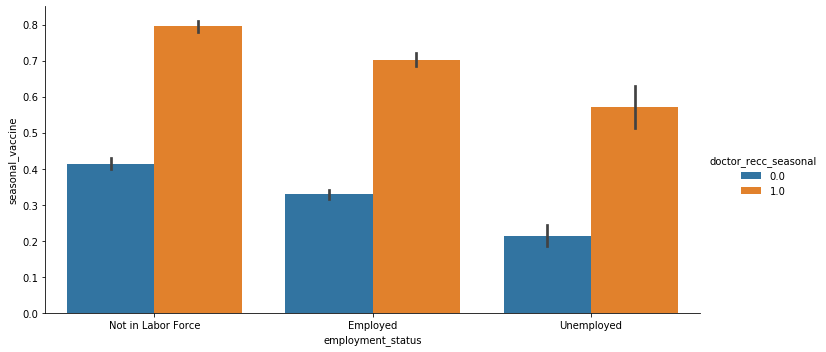

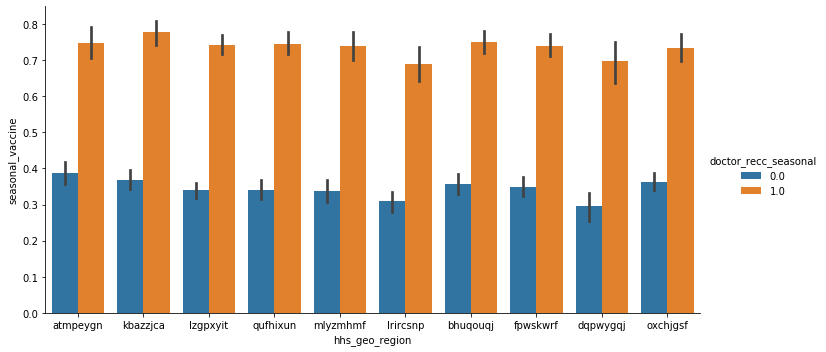

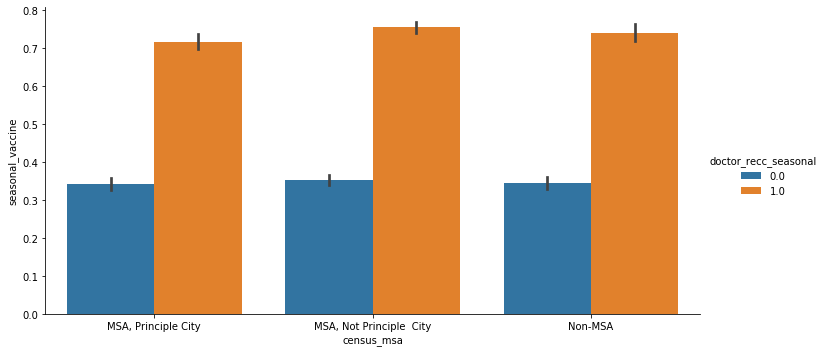

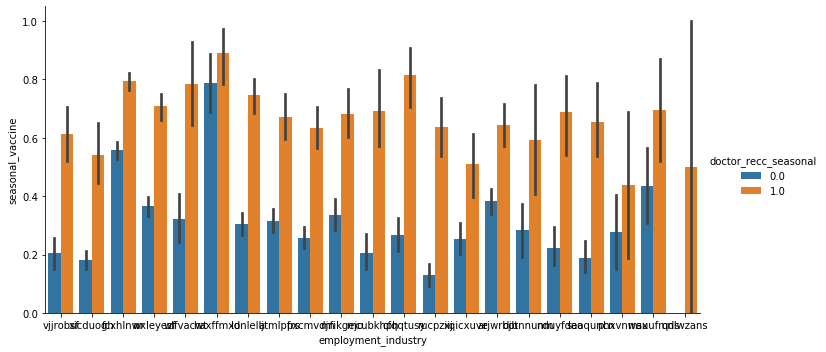

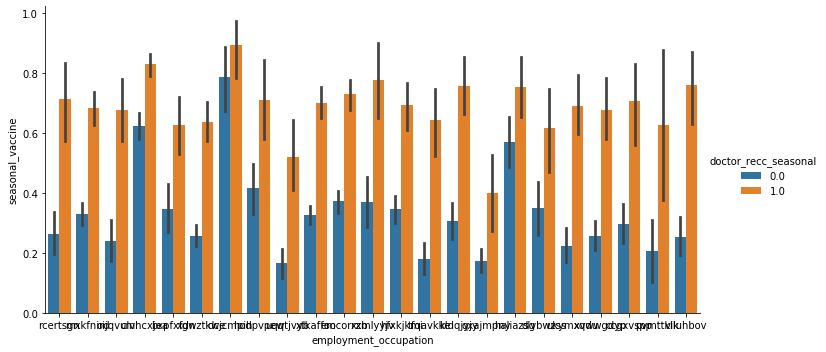

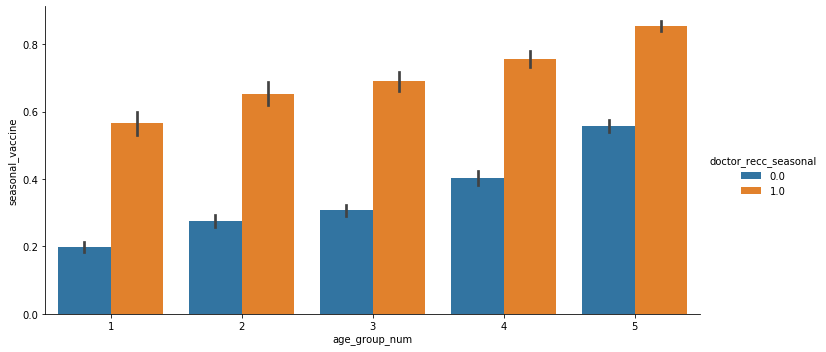

In [99]:
# plot bar graphs for each variable vs target
# test different hues to get sense of variable interactions
# interesting interactions:
# sex and marital status
# census_msa and race (what's going on?)
# sex and race
# also sex and employment status --> probably due to age

for c in train_to_plot.drop(columns=['seasonal_vaccine']).columns:
    sns.catplot(x=c, y="seasonal_vaccine", kind="bar", hue='doctor_recc_seasonal', data=train_to_plot, height=5, aspect=2)

['haxffmxo' 'fcxhlnwr' 'qnlwzans' 'msuufmds' 'wxleyezf' 'arjwrbjb'
 'mfikgejo' 'ldnlellj' 'wlfvacwt' 'atmlpfrs' 'cfqqtusy' 'dotnnunm'
 'phxvnwax' 'pxcmvdjn' 'xqicxuve' 'vjjrobsf' 'nduyfdeo' 'mcubkhph'
 'saaquncn' 'rucpziij' 'xicduogh']


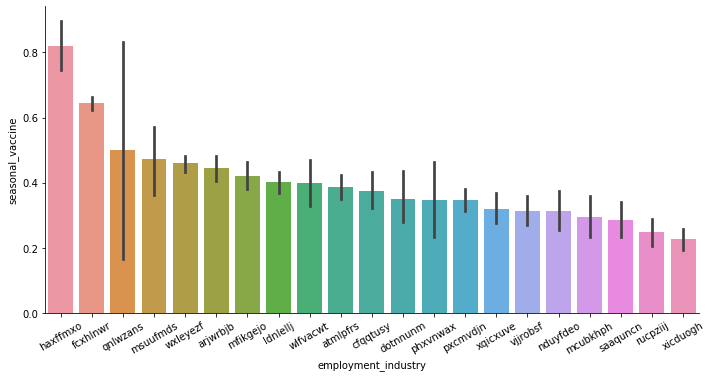

In [100]:
# arrange employment_industry values by probability - see if there are groupings
# reducing number of columns may reduce overfitting

sort_order = train_to_plot.groupby('employment_industry')['seasonal_vaccine'].mean().sort_values(ascending=False).index.values
plot = sns.catplot(data=train_to_plot, x='employment_industry', y='seasonal_vaccine', kind='bar', height=5, aspect=2, order=sort_order)
plot.set_xticklabels(rotation=30)
print(sort_order)

In [101]:
# create employment_industry groupings

ind_cat_1 = ['haxffmxo'] # clearly number one
ind_cat_2 = ['fcxhlnwr'] # clearly number two
ind_cat_3 = ['qnlwzans'] # clearly an oddball
ind_cat_4 = ['rucpziij','xicduogh'] # on the bottom
ind_cat_5 = ['msuufmds','arjwrbjb','wxleyezf','mfikgejo','wlfvacwt','phxvnwax','ldnlellj','dotnnunm','atmlpfrs'] # mid upper
ind_cat_6 = ['cfqqtusy','pxcmvdjn','xqicxuve','vjjrobsf','nduyfdeo','mcubkhph','saaquncn'] # mid lower

In [102]:
# create columns for employment_industry categories

ind_cat_list = [ind_cat_1, ind_cat_2, ind_cat_3, ind_cat_4, ind_cat_5, ind_cat_6]

for n, ind_cat in enumerate(ind_cat_list):
    X_train['ind_cat_'+str(n+1)] = X_train['employment_industry'].map(lambda x: 1 if x in ind_cat else 0)
    
X_train.head(100)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group,race,sex,marital_status,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation,ind_cat_1,ind_cat_2,ind_cat_3,ind_cat_4,ind_cat_5,ind_cat_6
8425,0.00000,0.00000,0.00000,nan,18 - 34 Years,White,Male,Not Married,Not in Labor Force,atmpeygn,"MSA, Principle City",NaN,NaN,0,0,0,0,0,0
23315,0.00000,1.00000,0.00000,nan,45 - 54 Years,White,Male,Married,Employed,kbazzjca,"MSA, Not Principle City",vjjrobsf,rcertsgn,0,0,0,0,0,1
9773,0.00000,0.00000,0.00000,0.00000,18 - 34 Years,Black,Female,Not Married,Unemployed,lzgpxyit,"MSA, Principle City",NaN,NaN,0,0,0,0,0,0
958,1.00000,1.00000,0.00000,nan,65+ Years,White,Male,Married,Not in Labor Force,qufhixun,"MSA, Principle City",NaN,NaN,0,0,0,0,0,0
7063,0.00000,0.00000,0.00000,1.00000,35 - 44 Years,White,Male,Married,Employed,mlyzmhmf,"MSA, Principle City",xicduogh,mxkfnird,0,0,0,1,0,0
21033,nan,0.00000,0.00000,1.00000,65+ Years,White,Female,Not Married,NaN,lrircsnp,"MSA, Principle City",NaN,NaN,0,0,0,0,0,0
1772,0.00000,0.00000,0.00000,nan,18 - 34 Years,Black,Female,NaN,NaN,qufhixun,"MSA, Principle City",NaN,NaN,0,0,0,0,0,0
15990,0.00000,0.00000,0.00000,nan,18 - 34 Years,White,Male,Not Married,Employed,kbazzjca,"MSA, Principle City",vjjrobsf,mxkfnird,0,0,0,0,0,1
23262,1.00000,nan,nan,nan,18 - 34 Years,White,Female,NaN,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN,0,0,0,0,0,0
25502,1.00000,0.00000,1.00000,0.00000,18 - 34 Years,White,Female,Not Married,Employed,qufhixun,"MSA, Not Principle City",fcxhlnwr,oijqvulv,0,1,0,0,0,0


['dcjcmpih' 'cmhcxjea' 'haliazsg' 'hodpvpew' 'emcorrxb' 'xzmlyyjv'
 'bxpfxfdn' 'mxkfnird' 'hfxkjkmi' 'xtkaffoo' 'dlvbwzss' 'kldqjyjy'
 'oijqvulv' 'rcertsgn' 'vlluhbov' 'ccgxvspp' 'xgwztkwe' 'ukymxvdu'
 'xqwwgdyp' 'tfqavkke' 'pvmttkik' 'uqqtjvyb' 'qxajmpny']


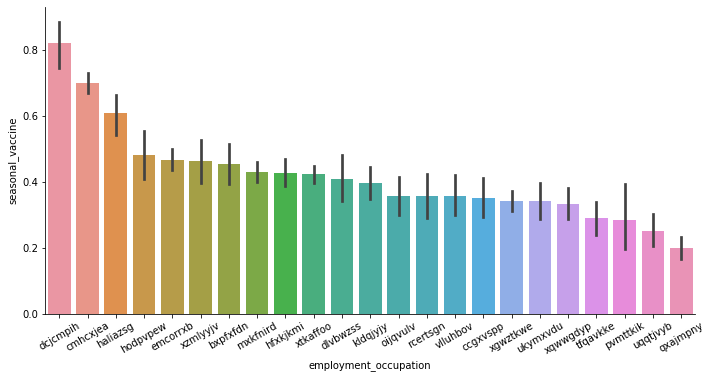

In [103]:
# arrange employment_occupation values by probability - see if there are groupings

sort_order = train_to_plot.groupby('employment_occupation')['seasonal_vaccine'].mean().sort_values(ascending=False).index.values
plot = sns.catplot(data=train_to_plot, x='employment_occupation', y='seasonal_vaccine', kind='bar', height=5, aspect=2, order=sort_order)
plot.set_xticklabels(rotation=30)
print(sort_order)

In [104]:
# create employment_occupation categories

occ_cat_1 = ['dcjcmpih'] # clearly number one
occ_cat_2 = ['cmhcxjea'] # clearly number two
occ_cat_3 = ['haliazsg'] # clearly number three
occ_cat_4 = ['tfqavkke','uqqtjvyb','qxajmpny'] # on the bottom
occ_cat_5 = ['xzmlyyjv', 'hodpvpew', 'emcorrxb','bxpfxfdn', 'mxkfnird', 'xtkaffoo', 'hfxkjkmi', 'dlvbwzss', 'kldqjyjy'] # mid upper
occ_cat_6 = ['vlluhbov','ukymxvdu','oijqvulv','xgwztkwe','rcertsgn','ccgxvspp','pvmttkik', 'xqwwgdyp'] # mid lower

In [105]:
# create categories for employment_occupation to reduce dimensionality

occ_cat_list = [occ_cat_1, occ_cat_2, occ_cat_3, occ_cat_4, occ_cat_5, occ_cat_6]

for n, occ_cat in enumerate(occ_cat_list):
    X_train['occ_cat_'+str(n+1)] = X_train['employment_occupation'].map(lambda x: 1 if x in occ_cat else 0)
    
X_train.head(100)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group,race,sex,marital_status,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation,ind_cat_1,ind_cat_2,ind_cat_3,ind_cat_4,ind_cat_5,ind_cat_6,occ_cat_1,occ_cat_2,occ_cat_3,occ_cat_4,occ_cat_5,occ_cat_6
8425,0.00000,0.00000,0.00000,nan,18 - 34 Years,White,Male,Not Married,Not in Labor Force,atmpeygn,"MSA, Principle City",NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
23315,0.00000,1.00000,0.00000,nan,45 - 54 Years,White,Male,Married,Employed,kbazzjca,"MSA, Not Principle City",vjjrobsf,rcertsgn,0,0,0,0,0,1,0,0,0,0,0,1
9773,0.00000,0.00000,0.00000,0.00000,18 - 34 Years,Black,Female,Not Married,Unemployed,lzgpxyit,"MSA, Principle City",NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
958,1.00000,1.00000,0.00000,nan,65+ Years,White,Male,Married,Not in Labor Force,qufhixun,"MSA, Principle City",NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
7063,0.00000,0.00000,0.00000,1.00000,35 - 44 Years,White,Male,Married,Employed,mlyzmhmf,"MSA, Principle City",xicduogh,mxkfnird,0,0,0,1,0,0,0,0,0,0,1,0
21033,nan,0.00000,0.00000,1.00000,65+ Years,White,Female,Not Married,NaN,lrircsnp,"MSA, Principle City",NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
1772,0.00000,0.00000,0.00000,nan,18 - 34 Years,Black,Female,NaN,NaN,qufhixun,"MSA, Principle City",NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
15990,0.00000,0.00000,0.00000,nan,18 - 34 Years,White,Male,Not Married,Employed,kbazzjca,"MSA, Principle City",vjjrobsf,mxkfnird,0,0,0,0,0,1,0,0,0,0,1,0
23262,1.00000,nan,nan,nan,18 - 34 Years,White,Female,NaN,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
25502,1.00000,0.00000,1.00000,0.00000,18 - 34 Years,White,Female,Not Married,Employed,qufhixun,"MSA, Not Principle City",fcxhlnwr,oijqvulv,0,1,0,0,0,0,0,0,0,0,0,1


In [106]:
# drop old 'employment_industry' and 'employment_occupation' columns

X_train.drop(columns=['employment_industry', 'employment_occupation'], inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [107]:
# encode remaining categorical columns in X_train
# do not drop all firsts, but drop sex_Female and race_Other to reduce columns

X_train_enc = pd.get_dummies(X_train, drop_first=False).drop(columns=['sex_Female','race_Other or Multiple'])

# experimented with removing more firsts, but did not improve model
# scores when dropped 1 column - female
# ROC Scores
# Train: 0.7817244813917411
# Test: 0.7748843069535213

# scores when dropped 2 columns - female and other race
# ROC Scores
# Train: 0.7803958619891809
# Test: 0.7782699504901386

# scores when 5 columns dropped
# ROC Scores
# Train: 0.780485435457886
# Test: 0.772152694994743
# worse!

In [108]:
# 4 columns still have nulls
X_train_enc.isna().sum()[:4]

doctor_recc_seasonal     1605
chronic_med_condition     709
health_worker             589
health_insurance         9193
dtype: int64

In [109]:
# cannot delete rows with missing health_insurance, since about 50%
# check for overlaps in nulls in other 3 rows, may be possible to delete these rows

X_train_delete_nulls = X_train.loc[(X_train['doctor_recc_seasonal'].notnull()
                                      & X_train['chronic_med_condition'].notnull()
                                      & X_train['health_worker'].notnull())]
X_train_delete_nulls

# if we delete all nulls in all 3 columns, we lose 2295 rows, 11% of data
# so let's not delete them
# Instead, fill them with 0s and create columns to indicate if they had nulls
# also tested filling them with the dummy value 0.5, but did not improve model

print('If I deleted rows with nulls in doctor_recc_seasonal, chronic_med_condition, health_worker:')
print('Number of rows deleted:', len(X_train) - len(X_train_delete_nulls))
print('Per cent of rows deleted:', round(((len(X_train) - len(X_train_delete_nulls))/len(X_train)*100),2), '%')


If I deleted rows with nulls in doctor_recc_seasonal, chronic_med_condition, health_worker:
Number of rows deleted: 2207
Per cent of rows deleted: 11.02 %


In [110]:
# create new columns to capture null info prior to filling nans with 0

X_train_nans=X_train_enc.copy()
X_train_nans['null_doctor_recc'] = X_train_nans['doctor_recc_seasonal'].apply(lambda x:1 if pd.isnull(x) else 0)
X_train_nans['null_chronic'] = X_train_nans['doctor_recc_seasonal'].apply(lambda x:1 if pd.isnull(x) else 0)
X_train_nans['null_health_worker'] = X_train_nans['health_worker'].apply(lambda x:1 if pd.isnull(x) else 0)
X_train_nans['null_health_ins'] = X_train_nans['health_insurance'].apply(lambda x:1 if pd.isnull(x) else 0)
X_train_nans.head(100)

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,ind_cat_1,ind_cat_2,ind_cat_3,ind_cat_4,ind_cat_5,ind_cat_6,occ_cat_1,occ_cat_2,occ_cat_3,occ_cat_4,occ_cat_5,occ_cat_6,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_White,sex_Male,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,null_doctor_recc,null_chronic,null_health_worker,null_health_ins
8425,0.00000,0.00000,0.00000,nan,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
23315,0.00000,1.00000,0.00000,nan,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
9773,0.00000,0.00000,0.00000,0.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
958,1.00000,1.00000,0.00000,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
7063,0.00000,0.00000,0.00000,1.00000,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
21033,nan,0.00000,0.00000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
1772,0.00000,0.00000,0.00000,nan,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
15990,0.00000,0.00000,0.00000,nan,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
23262,1.00000,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
25502,1.00000,0.00000,1.00000,0.00000,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [111]:
# fill nans with 0

X_train_nans.fillna(value=0, inplace=True)
X_train_nans.isna().sum().sum() #0
X_train_nans.shape
X_train_nans

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,ind_cat_1,ind_cat_2,ind_cat_3,ind_cat_4,ind_cat_5,ind_cat_6,occ_cat_1,occ_cat_2,occ_cat_3,occ_cat_4,occ_cat_5,occ_cat_6,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_White,sex_Male,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,null_doctor_recc,null_chronic,null_health_worker,null_health_ins
8425,0.00000,0.00000,0.00000,0.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
23315,0.00000,1.00000,0.00000,0.00000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
9773,0.00000,0.00000,0.00000,0.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
958,1.00000,1.00000,0.00000,0.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
7063,0.00000,0.00000,0.00000,1.00000,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,0.00000,0.00000,0.00000,0.00000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
14236,0.00000,0.00000,0.00000,1.00000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
25870,0.00000,0.00000,0.00000,0.00000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
12986,0.00000,0.00000,0.00000,0.00000,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


''

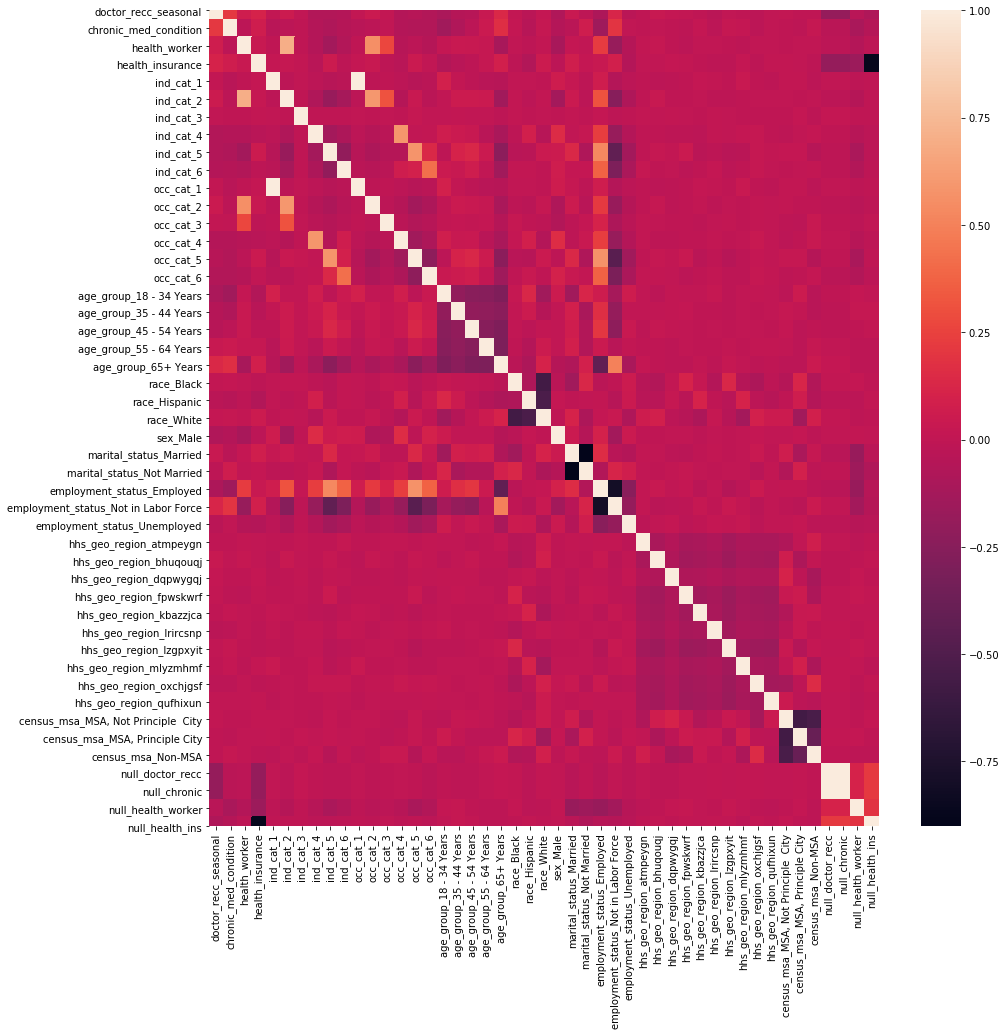

In [121]:
corr = X_train_nans.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, ax=ax);

# no surprising correlations, except maybe ind_cats and occ_cats

In [31]:
# run X_test thru same steps

# create categories for employment_industry
for n, ind_cat in enumerate(ind_cat_list):
    X_test['ind_cat_'+str(n+1)] = X_test['employment_industry'].map(lambda x: 1 if x in ind_cat else 0)

# create categories for employment_industry
for n, occ_cat in enumerate(occ_cat_list):
    X_test['occ_cat_'+str(n+1)] = X_test['employment_occupation'].map(lambda x: 1 if x in occ_cat else 0)

X_test.drop(columns=['employment_industry','employment_occupation'], inplace=True)

# encode categorical columns
X_test_enc = pd.get_dummies(X_test, drop_first=False).drop(columns=['sex_Female','race_Other or Multiple'])

# create columns to track null values
X_test_nans=X_test_enc.copy()
X_test_nans['null_doctor_recc'] = X_test_nans['doctor_recc_seasonal'].apply(lambda x:1 if pd.isnull(x) else 0)
X_test_nans['null_chronic'] = X_test_nans['doctor_recc_seasonal'].apply(lambda x:1 if pd.isnull(x) else 0)
X_test_nans['null_health_worker'] = X_test_nans['health_worker'].apply(lambda x:1 if pd.isnull(x) else 0)
X_test_nans['null_health_ins'] = X_test_nans['health_insurance'].apply(lambda x:1 if pd.isnull(x) else 0)

# fill remaining nulls with 0
X_test_nans.fillna(value=0, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pan

In [32]:
X_test_nans

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,ind_cat_1,ind_cat_2,ind_cat_3,ind_cat_4,ind_cat_5,ind_cat_6,occ_cat_1,occ_cat_2,occ_cat_3,occ_cat_4,occ_cat_5,occ_cat_6,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_White,sex_Male,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,null_doctor_recc,null_chronic,null_health_worker,null_health_ins
23090,0.00000,0.00000,0.00000,0.00000,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
18006,0.00000,0.00000,0.00000,1.00000,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5787,1.00000,0.00000,1.00000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
11108,1.00000,0.00000,0.00000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1810,0.00000,1.00000,0.00000,0.00000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17314,1.00000,1.00000,0.00000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
15346,1.00000,1.00000,0.00000,1.00000,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
6765,0.00000,1.00000,0.00000,0.00000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1
8848,1.00000,0.00000,1.00000,0.00000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


ROC Scores
Train: 0.7805421660653978
Test: 0.7752064493952


Accuracy Scores
Train: 0.7120818771842237
Test: 0.7094503519544706


F1 Scores
Train: 0.6796645003610509
Test: 0.6730704415234242


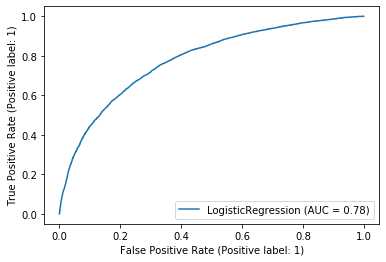

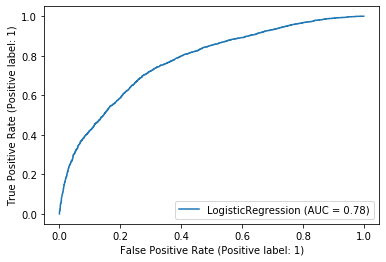

In [33]:
# plot ROC curves
logreg = ut.logreg_predict_score(X_train_nans, X_test_nans, y_train, y_test)
plot_roc_curve(logreg, X_train_nans, y_train)
plot_roc_curve(logreg, X_test_nans, y_test)

# slightly overfit

In [35]:
# Let's scale it!  # test Standard Scaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nans)
X_test_scaled = scaler.transform(X_test_nans)

In [36]:
ut.logreg_predict_score(X_train_scaled, X_test_scaled, y_train, y_test)

# no change - makes sense since everything is already on a 0-1 scale

ROC Scores
Train: 0.7805948343699997
Test: 0.7751586319891229


Accuracy Scores
Train: 0.7115327009485771
Test: 0.71334431630972


F1 Scores
Train: 0.6924305333759183
Test: 0.6912903225806452


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [37]:
# Let's scale it!  # test MixMax Scaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_nans)
X_test_scaled = scaler.transform(X_test_nans)

ut.logreg_predict_score(X_train_scaled, X_test_scaled, y_train, y_test)

# no change - makes sense since everything is already on a 0-1 scale

ROC Scores
Train: 0.7805421660653978
Test: 0.7752064493952


Accuracy Scores
Train: 0.7120818771842237
Test: 0.7094503519544706


F1 Scores
Train: 0.6796645003610509
Test: 0.6730704415234242


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [38]:
# add interaction term for man & married

X_train_inter = X_train_nans.copy()
X_train_inter['man_Married'] = X_train_inter['sex_Male'] * X_train_inter['marital_status_Married']
X_train_inter

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,ind_cat_1,ind_cat_2,ind_cat_3,ind_cat_4,ind_cat_5,ind_cat_6,occ_cat_1,occ_cat_2,occ_cat_3,occ_cat_4,occ_cat_5,occ_cat_6,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_White,sex_Male,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,null_doctor_recc,null_chronic,null_health_worker,null_health_ins,man_Married
4434,0.00000,0.00000,0.00000,1.00000,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1
14568,0.00000,1.00000,0.00000,1.00000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
11966,0.00000,0.00000,0.00000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
17808,0.00000,0.00000,0.00000,1.00000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3852,0.00000,1.00000,1.00000,0.00000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18712,1.00000,0.00000,0.00000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
11258,0.00000,0.00000,0.00000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
20479,0.00000,0.00000,0.00000,0.00000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1
5644,0.00000,0.00000,0.00000,1.00000,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [39]:
# do same steps on X_test
X_test_inter = X_test_nans.copy()
X_test_inter['man_Married'] = X_test_inter['sex_Male'] * X_test_inter['marital_status_Married']
X_test_inter

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,ind_cat_1,ind_cat_2,ind_cat_3,ind_cat_4,ind_cat_5,ind_cat_6,occ_cat_1,occ_cat_2,occ_cat_3,occ_cat_4,occ_cat_5,occ_cat_6,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_White,sex_Male,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,null_doctor_recc,null_chronic,null_health_worker,null_health_ins,man_Married
23090,0.00000,0.00000,0.00000,0.00000,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
18006,0.00000,0.00000,0.00000,1.00000,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5787,1.00000,0.00000,1.00000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
11108,1.00000,0.00000,0.00000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
1810,0.00000,1.00000,0.00000,0.00000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17314,1.00000,1.00000,0.00000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
15346,1.00000,1.00000,0.00000,1.00000,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
6765,0.00000,1.00000,0.00000,0.00000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0
8848,1.00000,0.00000,1.00000,0.00000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [40]:
# test version with interaction term

ut.logreg_predict_score(X_train_inter, X_test_inter, y_train, y_test)

# no change

ROC Scores
Train: 0.7805839782296328
Test: 0.7749831511309718


Accuracy Scores
Train: 0.7119321018472291
Test: 0.7096001198142878


F1 Scores
Train: 0.6799068012870298
Test: 0.673404076132727


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

ROC Scores
Train: 0.7805422161398459
Test: 0.7752028405343641


Accuracy Scores
Train: 0.7121318022965551
Test: 0.7094503519544706


F1 Scores
Train: 0.6797022553049661
Test: 0.6730704415234242


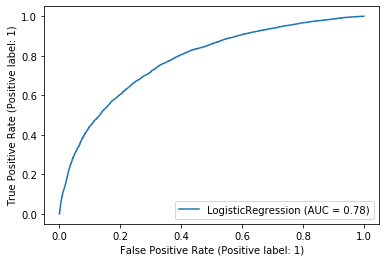

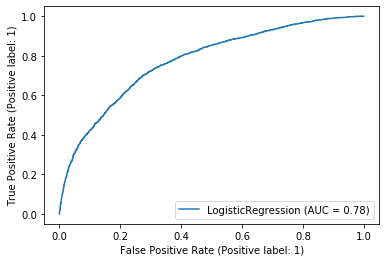

In [41]:
# test fit_intercept=True

# make logistic regression
logreg = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear')
logreg.fit(X_train_nans, y_train)

# print ROC scores
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, logreg)

# no change

LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
ROC Scores
Train: 0.7805394019558577
Test: 0.7752207946170232


Accuracy Scores
Train: 0.7120818771842237
Test: 0.7094503519544706


F1 Scores
Train: 0.6796645003610509
Test: 0.6730704415234242


LogisticRegression(C=100, fit_intercept=False, solver='liblinear')
ROC Scores
Train: 0.7805416252613574
Test: 0.7752042840786985


Accuracy Scores
Train: 0.7120818771842237
Test: 0.7094503519544706


F1 Scores
Train: 0.6796645003610509
Test: 0.6730704415234242


LogisticRegression(C=1000, fit_intercept=False, solver='liblinear')
ROC Scores
Train: 0.7805424965567558
Test: 0.7752048254078238


Accuracy Scores
Train: 0.7120818771842237
Test: 0.7094503519544706


F1 Scores
Train: 0.6796645003610509
Test: 0.6730704415234242




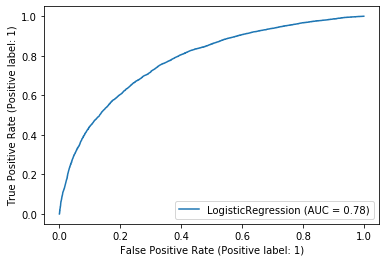

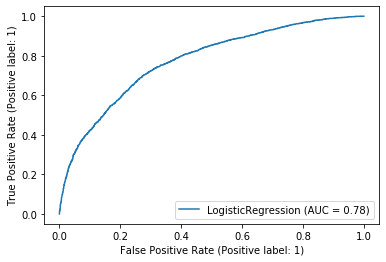

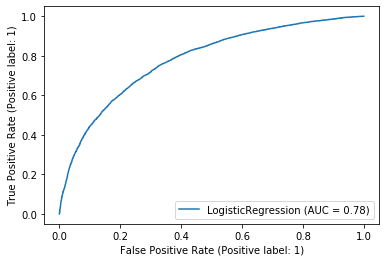

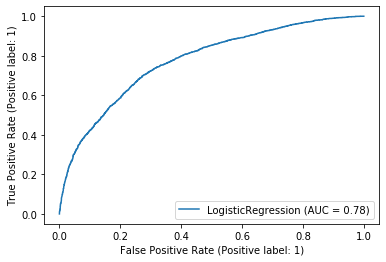

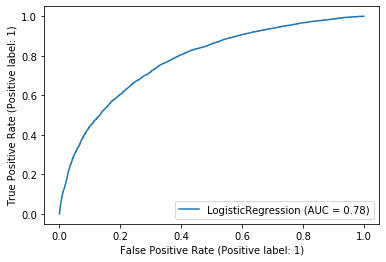

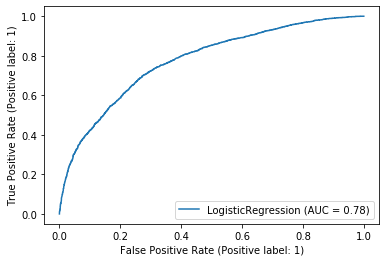

In [42]:
# test C

c_list = [10,100,1000]

# make logreg and score
for c in c_list:
    # make logistic regression
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    logreg.fit(X_train_nans, y_train)
    print(logreg)
    ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, logreg)
    print('\n')
    
# no change

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='newton-cg')
ROC Scores
Train: 0.7805424164376387
Test: 0.7752039231926149


Accuracy Scores
Train: 0.7121318022965551
Test: 0.7094503519544706


F1 Scores
Train: 0.6797022553049661
Test: 0.6730704415234242




/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

LogisticRegression(C=1000000000000.0, fit_intercept=False)
ROC Scores
Train: 0.7805439286859739
Test: 0.7752185390790007


Accuracy Scores
Train: 0.7122316525212182
Test: 0.7094503519544706


F1 Scores
Train: 0.6798844829501277
Test: 0.6730704415234242


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')
ROC Scores
Train: 0.7805421660653978
Test: 0.7752064493952


Accuracy Scores
Train: 0.7120818771842237
Test: 0.7094503519544706


F1 Scores
Train: 0.6796645003610509
Test: 0.6730704415234242


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='sag')
ROC Scores
Train: 0.7805435481201677
Test: 0.7752055471799911


Accuracy Scores
Train: 0.7121318022965551
Test: 0.7094503519544706


F1 Scores
Train: 0.6797022553049661
Test: 0.6730704415234242


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='saga')
ROC Scores
Train: 0.7805426768247693
Test: 0.7752036525280521


Accuracy Scores
Train: 0.7121318022965551
Test: 0.7094503519544706

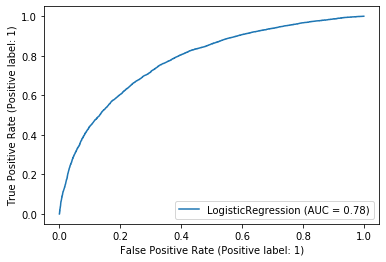

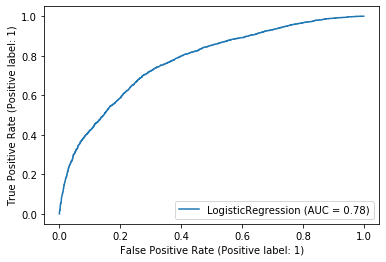

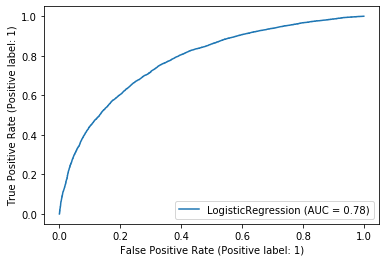

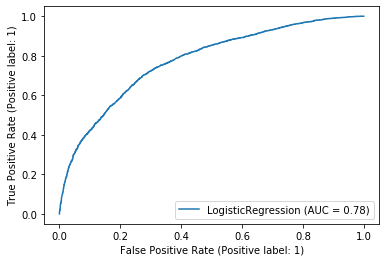

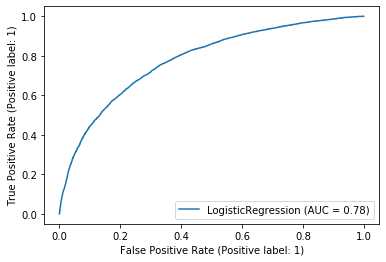

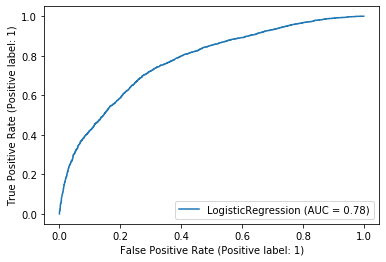

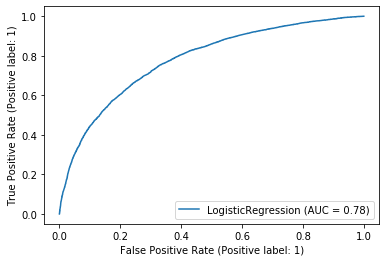

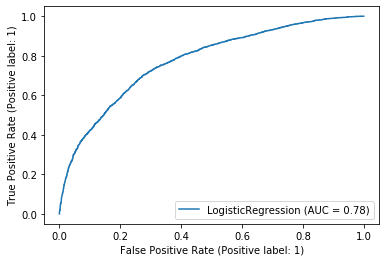

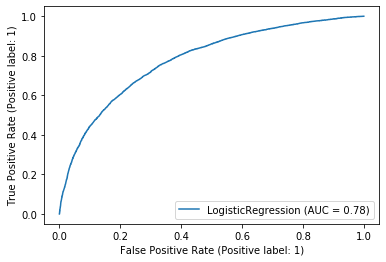

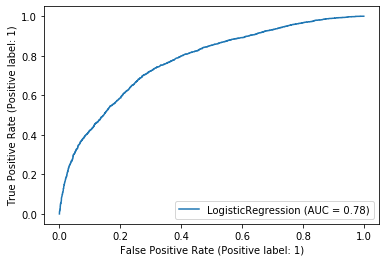

In [43]:
# test solvers

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for s in solvers:
    # make logistic regression
    logreg = LogisticRegression(fit_intercept=False, C=1e12, solver=s)
    logreg.fit(X_train_nans, y_train)
    # score
    print(logreg)
    ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, logreg)
    print('\n')
    
    # no change

In [44]:
# no change when using different scalers, adding interaction terms, or changing logreg parameters
# stick with inital df (X_train_nans)
# stick with initial values for logreg
best_logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
best_logreg.fit(X_train_nans, y_train)

# check out coefficients
len(best_logreg.coef_[0])
len(X_train_nans.columns)

coef_dict={}

for n, c in enumerate(X_train_nans.columns):
    coef_dict[c]=round(best_logreg.coef_[0][n],2)

sorted_coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1], reverse=True)}

df = pd.DataFrame.from_dict(sorted_coef_dict, orient='index', columns=['weight'])
df['abs_weight']=np.abs(df['weight'])
df.sort_values(by = 'abs_weight', ascending=False)

,weight,abs_weight
doctor_recc_seasonal,1.53000,1.53000
ind_cat_1,1.45000,1.45000
occ_cat_1,1.45000,1.45000
ind_cat_3,1.25000,1.25000
age_group_18 - 34 Years,-0.95000,0.95000
census_msa_Non-MSA,-0.73000,0.73000
ind_cat_2,0.72000,0.72000
age_group_35 - 44 Years,-0.72000,0.72000
health_insurance,0.67000,0.67000
health_worker,0.65000,0.65000


In [45]:
# run lists below to be sure my coefficients were linking up to the right column labels
# they are

tuple_list = []

for n in range(len(best_logreg.coef_[0])):
    tuple = (n, best_logreg.coef_[0][n])
    tuple_list.append(tuple)
    
tuple_list

[(0, 1.5270241904906359),
 (1, 0.37843952355611105),
 (2, 0.6549168214097427),
 (3, 0.6652437131860055),
 (4, 1.4521368672353991),
 (5, 0.7152337068751233),
 (6, 1.2489129610178809),
 (7, 0.06197015058455267),
 (8, 0.5451012621069046),
 (9, 0.2187997858774794),
 (10, 1.4521368672353991),
 (11, 0.37000250346555286),
 (12, 0.12419924166005707),
 (13, -0.24955512194522644),
 (14, 0.04754299796743299),
 (15, -0.13608860815406823),
 (16, -0.9462246296632437),
 (17, -0.7208028766118562),
 (18, -0.5182909483059595),
 (19, -0.1417283635958988),
 (20, 0.49503976653931425),
 (21, -0.5552530214734994),
 (22, -0.11181147618771357),
 (23, 0.03495751014498889),
 (24, -0.06743522565343468),
 (25, 0.006107463734012978),
 (26, -0.1663850176692889),
 (27, -0.5337076038821311),
 (28, -0.07248440841911208),
 (29, -0.4066580080276845),
 (30, -0.10396030780083011),
 (31, -0.17228025242660494),
 (32, -0.3525234386271015),
 (33, -0.09681151232330762),
 (34, -0.05661080711144736),
 (35, -0.34263224671490544),


In [46]:
col_list = []

for n in range(len(best_logreg.coef_[0])):
    tuple = (n, X_train_nans.columns[n])
    col_list.append(tuple)
    
col_list

[(0, 'doctor_recc_seasonal'),
 (1, 'chronic_med_condition'),
 (2, 'health_worker'),
 (3, 'health_insurance'),
 (4, 'ind_cat_1'),
 (5, 'ind_cat_2'),
 (6, 'ind_cat_3'),
 (7, 'ind_cat_4'),
 (8, 'ind_cat_5'),
 (9, 'ind_cat_6'),
 (10, 'occ_cat_1'),
 (11, 'occ_cat_2'),
 (12, 'occ_cat_3'),
 (13, 'occ_cat_4'),
 (14, 'occ_cat_5'),
 (15, 'occ_cat_6'),
 (16, 'age_group_18 - 34 Years'),
 (17, 'age_group_35 - 44 Years'),
 (18, 'age_group_45 - 54 Years'),
 (19, 'age_group_55 - 64 Years'),
 (20, 'age_group_65+ Years'),
 (21, 'race_Black'),
 (22, 'race_Hispanic'),
 (23, 'race_White'),
 (24, 'sex_Male'),
 (25, 'marital_status_Married'),
 (26, 'marital_status_Not Married'),
 (27, 'employment_status_Employed'),
 (28, 'employment_status_Not in Labor Force'),
 (29, 'employment_status_Unemployed'),
 (30, 'hhs_geo_region_atmpeygn'),
 (31, 'hhs_geo_region_bhuqouqj'),
 (32, 'hhs_geo_region_dqpwygqj'),
 (33, 'hhs_geo_region_fpwskwrf'),
 (34, 'hhs_geo_region_kbazzjca'),
 (35, 'hhs_geo_region_lrircsnp'),
 (36, 'h

ROC Scores
Train: 0.9829841967545248
Test: 0.6332159100238817


Accuracy Scores
Train: 0.9132301547678482
Test: 0.6260296540362438


F1 Scores
Train: 0.903487338960462
Test: 0.5809699614029198


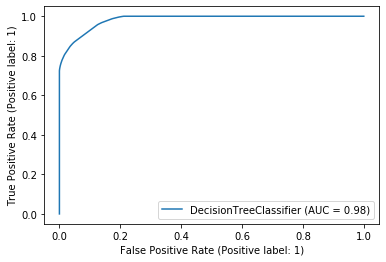

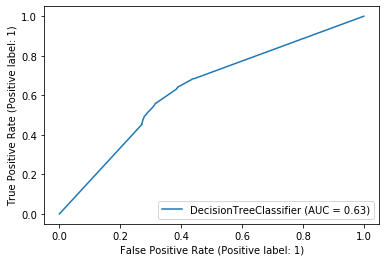

In [47]:
# let's do another model!

tree = DecisionTreeClassifier()

ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, tree)

# yikes, that's really overfit!  let's prune the tree

ROC Scores
Train: 0.771793343753826
Test: 0.7603147107092043


Accuracy Scores
Train: 0.7126310534198702
Test: 0.7021117268234237


F1 Scores
Train: 0.6856362643364281
Test: 0.6736669401148483


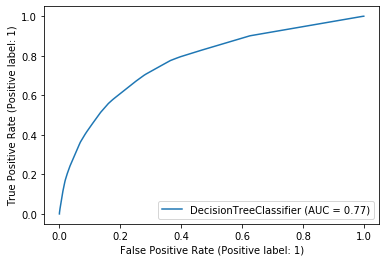

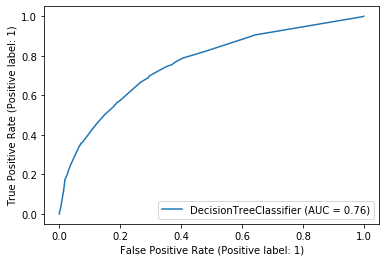

In [48]:
tree = DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=5, max_features=40, criterion='gini')

ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, tree)

# better, but not better than logreg

In [49]:
def order_features(weights, X_train):
    
    coef_dict = {}

    for n, c in enumerate(X_train.columns):
        coef_dict[c]=round(weights[n],4)

    sorted_coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1], reverse=True)}
    df = pd.DataFrame.from_dict(sorted_coef_dict, orient='index', columns=['weight'])
    df['abs_weight']=np.abs(df['weight'])
    weights_df = df.sort_values(by = 'abs_weight', ascending=False)
    
    return weights_df

In [50]:
tree.feature_importances_

array([4.75234351e-01, 1.72671050e-02, 1.06943553e-01, 1.19262834e-02,
       3.31119442e-03, 1.08187033e-02, 0.00000000e+00, 0.00000000e+00,
       1.30938098e-02, 4.67438970e-03, 1.70178864e-02, 1.68737408e-03,
       0.00000000e+00, 1.57532091e-03, 0.00000000e+00, 1.46002883e-03,
       1.13892514e-02, 0.00000000e+00, 0.00000000e+00, 3.86073678e-02,
       2.51333638e-01, 1.53217053e-02, 0.00000000e+00, 6.47273172e-03,
       1.18100084e-03, 0.00000000e+00, 1.31624501e-03, 2.18753263e-04,
       1.01807924e-03, 1.86726399e-03, 6.66808766e-04, 0.00000000e+00,
       6.64337504e-04, 9.70744584e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.07723681e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.97962996e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.05205993e-04])

In [51]:
order_features(tree.feature_importances_, X_train_nans)

,weight,abs_weight
doctor_recc_seasonal,0.47520,0.47520
age_group_65+ Years,0.25130,0.25130
health_worker,0.10690,0.10690
age_group_55 - 64 Years,0.03860,0.03860
chronic_med_condition,0.01730,0.01730
occ_cat_1,0.01700,0.01700
race_Black,0.01530,0.01530
ind_cat_5,0.01310,0.01310
health_insurance,0.01190,0.01190
age_group_18 - 34 Years,0.01140,0.01140


In [52]:
tree_param_grid = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 4, 6, 8],
                 'min_samples_leaf': [10, 12, 14],
                 'min_samples_split': [8, 10, 12],
                  'max_features': [30, 37, 45]}
                 
tree_grid_search = GridSearchCV(tree, tree_param_grid, cv=3)
tree_grid_search.fit(X_train_nans, y_train)

print(f"Training Accuracy: {tree_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {tree_grid_search.best_params_}")

Training Accuracy: 70.68%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 37, 'min_samples_leaf': 10, 'min_samples_split': 10}


ROC Scores
Train: 0.7838524576413983
Test: 0.7602803363097413


Accuracy Scores
Train: 0.7155766350474289
Test: 0.6997154410663472


F1 Scores
Train: 0.6754031109338499
Test: 0.6548459287312791


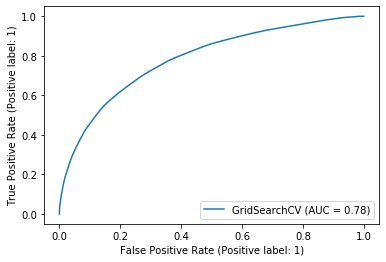

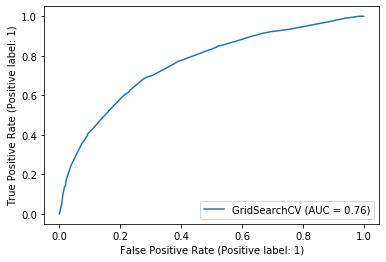

In [53]:
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, tree_grid_search)

In [54]:
tree_grid_search.best_estimator_.feature_importances_

array([5.06263907e-01, 1.67382155e-02, 3.54499183e-02, 2.48716094e-02,
       1.78045169e-02, 5.02375161e-02, 0.00000000e+00, 5.65291547e-03,
       1.28794352e-02, 2.14419264e-03, 4.61936207e-03, 2.46377238e-03,
       0.00000000e+00, 2.59292888e-03, 1.29644180e-03, 2.32779218e-03,
       7.55975208e-02, 1.77269217e-04, 1.96333280e-03, 2.76275854e-02,
       1.16530253e-01, 1.19275866e-02, 5.12762001e-04, 2.24020912e-02,
       5.04700161e-03, 1.31835587e-03, 6.59349290e-03, 1.77551826e-03,
       3.32935336e-03, 1.50777458e-03, 2.39645475e-03, 3.69644529e-04,
       3.84115948e-03, 1.86555110e-03, 1.62233008e-03, 0.00000000e+00,
       3.54620149e-03, 3.28520470e-04, 2.58375028e-03, 2.35436705e-03,
       6.53748808e-03, 3.23659807e-03, 3.30614662e-03, 0.00000000e+00,
       4.40284285e-04, 0.00000000e+00, 5.91908216e-03])

In [55]:
order_features(tree_grid_search.best_estimator_.feature_importances_, X_train_nans)

,weight,abs_weight
doctor_recc_seasonal,0.50630,0.50630
age_group_65+ Years,0.11650,0.11650
age_group_18 - 34 Years,0.07560,0.07560
ind_cat_2,0.05020,0.05020
health_worker,0.03540,0.03540
age_group_55 - 64 Years,0.02760,0.02760
health_insurance,0.02490,0.02490
race_White,0.02240,0.02240
ind_cat_1,0.01780,0.01780
chronic_med_condition,0.01670,0.01670


In [56]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(X_train_nans, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

ROC Scores
Train: 0.7726319805971528
Test: 0.7654373984444005


Accuracy Scores
Train: 0.7118322516225661
Test: 0.7028605661225101


F1 Scores
Train: 0.6939879122044322
Test: 0.683572567783094


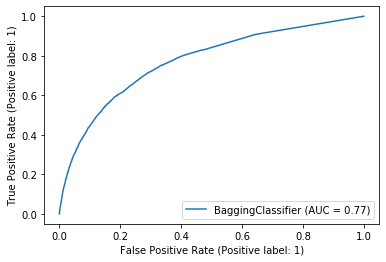

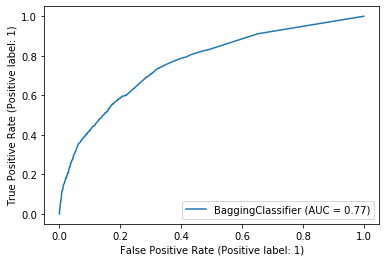

In [57]:
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, bagged_tree)


In [58]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train_nans, y_train)

RandomForestClassifier(max_depth=5)

ROC Scores
Train: 0.7770753417643682
Test: 0.7714428586508453


Accuracy Scores
Train: 0.7105341987019471
Test: 0.7076531376366632


F1 Scores
Train: 0.6657827991699332
Test: 0.6587412587412588


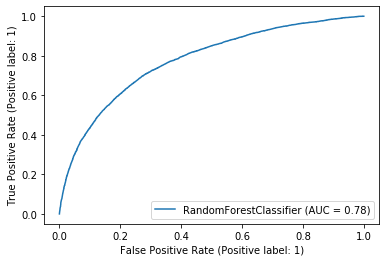

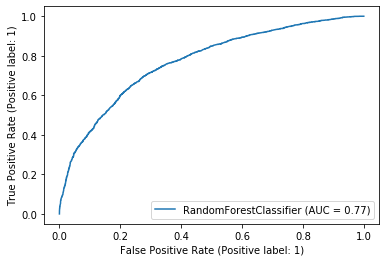

In [59]:
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, forest)

# even better score.  Try grid search with random forest.

In [60]:
rf_param_grid = {'n_estimators': [50, 100],
                 'criterion': ['gini', 'entropy'],
                 'max_depth': [6, 10, 14],
                 'min_samples_leaf': [3, 6, 9],
                'min_samples_split': [5, 10, 15]}
                 
rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=3)
rf_grid_search.fit(X_train_nans, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")



Training Accuracy: 71.10%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


ROC Scores
Train: 0.799156040242831
Test: 0.7767268624654113


Accuracy Scores
Train: 0.7251622566150774
Test: 0.7125954770106335


F1 Scores
Train: 0.6988347283768258
Test: 0.6828623368038341


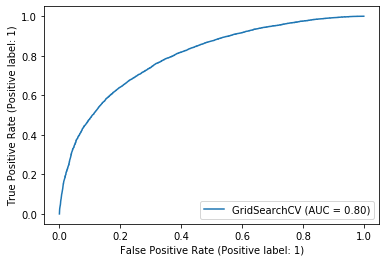

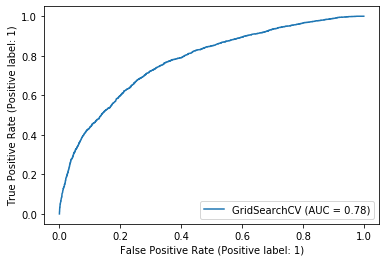

In [61]:
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, rf_grid_search)
# overfit

In [62]:
XGB = XGBClassifier()

# Fit XGBClassifier
XGB.fit(X_train_nans, y_train)


XGBClassifier()

ROC Scores
Train: 0.7864426986822659
Test: 0.7765252173661992


Accuracy Scores
Train: 0.7181228157763355
Test: 0.7098996555339224


F1 Scores
Train: 0.6879973474801061
Test: 0.6743990586653219


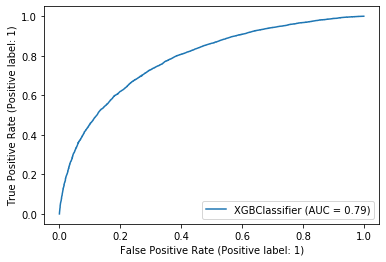

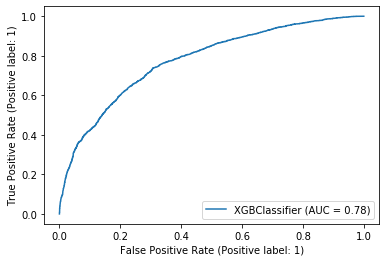

In [63]:
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, XGB)
# less overfit

In [64]:
xgb_param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6, 8],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100]}

In [65]:
grid_XGB = GridSearchCV(XGB, xgb_param_grid, cv=None, n_jobs=1)
grid_XGB.fit(X_train_nans, y_train)


GridSearchCV(estimator=XGBClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [6, 8],
                         'min_child_weight': [1, 2], 'n_estimators': [100],
                         'subsample': [0.5, 0.7]})

In [66]:
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, grid_XGB)
# not better... try different parameters?

KeyboardInterrupt: 

In [ ]:
SVM = SVC(kernel='linear')
SVM.fit(X_train_nans, y_train)

In [ ]:
y_train_pred = SVM.predict(X_train_nans)
y_test_pred = SVM.predict(X_test_nans)

#     print('ROC Scores')
#     print('Train:', roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
#     print('Test:', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
#     print('\n')
print('Accuracy Scores')
print('Train:', accuracy_score(y_train, y_train_pred))
print('Test:', accuracy_score(y_test, y_test_pred))
print('\n')
print('F1 Scores')
print('Train:', f1_score(y_train, y_train_pred))
print('Test:', f1_score(y_test, y_test_pred))

#     plot_roc_curve(model, X_train, y_train)
#     plot_roc_curve(model, X_test, y_test);

# worse scores

In [ ]:
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, SVM)